In [1]:
import sys
import pandas as pd
import numpy as np
import pylab as pl
sys.path.insert(0, '../src')
from analysis import no_streaming_viz, streaming_viz, pktdir_vs_pktsze_int, pktdir_vs_pktsze_vid, prominence_analysis
from features import modify_data, big_byte_count_feature, three_cols

In [2]:
#loading in one example of the non streaming data
nonstreaming_df = pd.read_csv('/teams/DSC180A_FA20_A00/b05vpnxray/data/unzipped/pgaddiso-novideo-vpn-linux-20201111.csv')

In [3]:
#loading one example of the streaming data
streaming_df = pd.read_csv('/teams/DSC180A_FA20_A00/b05vpnxray/data/unzipped/maqader-netflix-1x-vpn-mac-clean-20201102d.csv')

# Analysis

In this EDA, we want to look into the different data captured and analyze what are some possible ways to identify whether that data was collected while a user was streaming videos

In the extended version of network_stats that was provided to us by viasat, we can see there are a couple extra rows of data. These rows include ["packet_times", "packet_sizes", "packet_dirs"]

Below we are data scraping the last two columns in order to analyze and look at the two types of network movements/flows (1-2,2-1)

We are now separating every packet size to an individual row. This allows us to see and analyze every packet and its direction as individuals and be able to dive deeper in the understanding and identify patterns of video streaming activity.

The table below shows an example of what the modified data looks like with each packet size and its direction (upload or download).

In [4]:
modify_data(nonstreaming_df).head()

,packet_sizes,packet_dir
0,106,2
1,151,2
2,235,2
3,106,1
4,106,2


### From there we are able to use the modified data in order to count the frequency of packet sizes. The first graph shows the packet frequency of a non streaming dataset. 

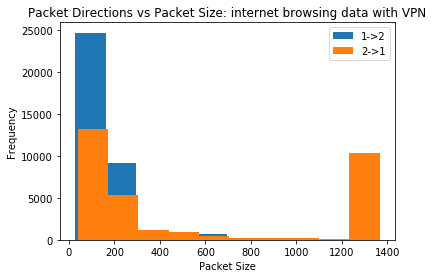

In [5]:
pktdir_vs_pktsze_int(modify_data(nonstreaming_df))

### The graph below shows the packet size frequency of a streaming dataset. 

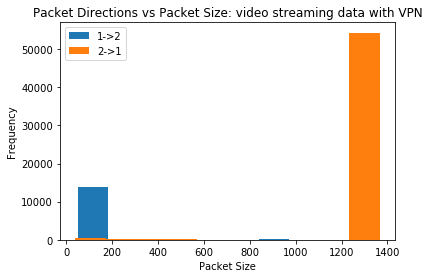

In [6]:
pktdir_vs_pktsze_vid(modify_data(streaming_df))

From here we are able to see that streaming data has a lot more of packet sizes that are of larger size. We are able to look at the means of the packet sizes for each scenario and be able to use that as a value of comparison for the features that are going to be put into the machine learning model/classifier. 

From there we are able to make features that go into our model with this analysis. 

# Packet Size Analysis

Since the majority of packet sizes range from 0-300 bytes and 1200-1500 bytes, I think that developing a feature on the counts of those ranges can be beneficial in discovering if streaming is occuring.

The way that I would use the two features I created above in my machine learning model would be by looking at the counts of the byte ranges and training my model on this since there is a clear divide between the range count of streaming vs non-streaming, as the count of the ranges are significantly higher when streaming is occuring. This is evident in my examples below for no streaming vs streaming.

In [7]:
#Example of byte count feature extraction on the no streaming dataset:
no_streaming_viz(nonstreaming_df)

No Streaming Byte Count: 


,0-300bytesCount_Direction1,1200-1500bytesCount_Direction2
0,33814,10360


In [8]:
#Example of byte count feature extraction on the streaming dataset:
streaming_viz(streaming_df)

Streaming Byte Count: 


,0-300bytesCount_Direction1,1200-1500bytesCount_Direction2
0,13872,54307


# Max Prominence Analysis

The two graphs below show the datasets in the frequency domain, with the x's marking the spikes found within the data. The spikes, which are the peaks of the dataset, helped us analyze the data further because as visible by the y axis, streaming data has way more prominent peaks, while non streaming does not. This is what we used in the development of one of our features, since by looking at the max prominence value, we could potentially use this in our classifier as a feature.

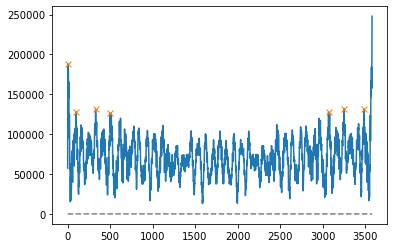

'Max Prominence Value: 130761.87026734216'

In [9]:
prominence_analysis(nonstreaming_df)

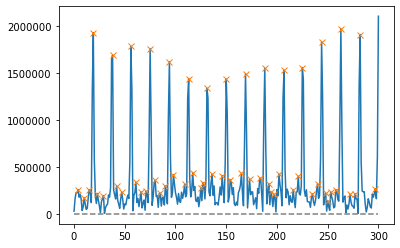

'Max Prominence Value: 1970397.9586457754'

In [10]:
prominence_analysis(streaming_df)